In [182]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import pickle
from tensorflow.keras.models import save_model, load_model

In [115]:
df = pd.read_csv("database.csv")

In [116]:
df.head()

,Date,Time,Latitude,Longitude,Type,Depth,Depth Error,Depth Seismic Stations,Magnitude,Magnitude Type,...,Magnitude Seismic Stations,Azimuthal Gap,Horizontal Distance,Horizontal Error,Root Mean Square,ID,Source,Location Source,Magnitude Source,Status
0,01/02/1965,13:44:18,19.246,145.616,Earthquake,131.6,NaN,NaN,6.0,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860706,ISCGEM,ISCGEM,ISCGEM,Automatic
1,01/04/1965,11:29:49,1.863,127.352,Earthquake,80.0,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860737,ISCGEM,ISCGEM,ISCGEM,Automatic
2,01/05/1965,18:05:58,-20.579,-173.972,Earthquake,20.0,NaN,NaN,6.2,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860762,ISCGEM,ISCGEM,ISCGEM,Automatic
3,01/08/1965,18:49:43,-59.076,-23.557,Earthquake,15.0,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860856,ISCGEM,ISCGEM,ISCGEM,Automatic
4,01/09/1965,13:32:50,11.938,126.427,Earthquake,15.0,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860890,ISCGEM,ISCGEM,ISCGEM,Automatic


In [117]:
df.isna().mean()

Date                          0.000000
Time                          0.000000
Latitude                      0.000000
Longitude                     0.000000
Type                          0.000000
Depth                         0.000000
Depth Error                   0.809457
Depth Seismic Stations        0.696865
Magnitude                     0.000000
Magnitude Type                0.000128
Magnitude Error               0.986033
Magnitude Seismic Stations    0.890484
Azimuthal Gap                 0.688237
Horizontal Distance           0.931488
Horizontal Error              0.950624
Root Mean Square              0.258842
ID                            0.000000
Source                        0.000000
Location Source               0.000000
Magnitude Source              0.000000
Status                        0.000000
dtype: float64

In [118]:
df.isna().sum()>0.66*df.shape[0]

Date                          False
Time                          False
Latitude                      False
Longitude                     False
Type                          False
Depth                         False
Depth Error                    True
Depth Seismic Stations         True
Magnitude                     False
Magnitude Type                False
Magnitude Error                True
Magnitude Seismic Stations     True
Azimuthal Gap                  True
Horizontal Distance            True
Horizontal Error               True
Root Mean Square              False
ID                            False
Source                        False
Location Source               False
Magnitude Source              False
Status                        False
dtype: bool

In [119]:
null_col = df.loc[:,df.isna().sum()>0.66*df.shape[0]].columns

In [120]:
df =df.drop("ID",axis =1)

In [121]:
null_col

Index(['Depth Error', 'Depth Seismic Stations', 'Magnitude Error',
       'Magnitude Seismic Stations', 'Azimuthal Gap', 'Horizontal Distance',
       'Horizontal Error'],
      dtype='object')

In [122]:
df= df.drop(null_col,axis=1)

In [123]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23412 entries, 0 to 23411
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Date              23412 non-null  object 
 1   Time              23412 non-null  object 
 2   Latitude          23412 non-null  float64
 3   Longitude         23412 non-null  float64
 4   Type              23412 non-null  object 
 5   Depth             23412 non-null  float64
 6   Magnitude         23412 non-null  float64
 7   Magnitude Type    23409 non-null  object 
 8   Root Mean Square  17352 non-null  float64
 9   Source            23412 non-null  object 
 10  Location Source   23412 non-null  object 
 11  Magnitude Source  23412 non-null  object 
 12  Status            23412 non-null  object 
dtypes: float64(5), object(8)
memory usage: 2.3+ MB


In [124]:
df.isna().sum()

Date                   0
Time                   0
Latitude               0
Longitude              0
Type                   0
Depth                  0
Magnitude              0
Magnitude Type         3
Root Mean Square    6060
Source                 0
Location Source        0
Magnitude Source       0
Status                 0
dtype: int64

In [125]:
df["Root Mean Square"]=df["Root Mean Square"].fillna(df["Root Mean Square"].mean())

In [126]:
df.isna().sum()

Date                0
Time                0
Latitude            0
Longitude           0
Type                0
Depth               0
Magnitude           0
Magnitude Type      3
Root Mean Square    0
Source              0
Location Source     0
Magnitude Source    0
Status              0
dtype: int64

In [127]:
df=df.dropna(axis = 0).reset_index(drop=True)

In [128]:
df.isna().sum().sum()

0

# feature Engineering

In [129]:
df.head()

,Date,Time,Latitude,Longitude,Type,Depth,Magnitude,Magnitude Type,Root Mean Square,Source,Location Source,Magnitude Source,Status
0,01/02/1965,13:44:18,19.246,145.616,Earthquake,131.6,6.0,MW,1.022784,ISCGEM,ISCGEM,ISCGEM,Automatic
1,01/04/1965,11:29:49,1.863,127.352,Earthquake,80.0,5.8,MW,1.022784,ISCGEM,ISCGEM,ISCGEM,Automatic
2,01/05/1965,18:05:58,-20.579,-173.972,Earthquake,20.0,6.2,MW,1.022784,ISCGEM,ISCGEM,ISCGEM,Automatic
3,01/08/1965,18:49:43,-59.076,-23.557,Earthquake,15.0,5.8,MW,1.022784,ISCGEM,ISCGEM,ISCGEM,Automatic
4,01/09/1965,13:32:50,11.938,126.427,Earthquake,15.0,5.8,MW,1.022784,ISCGEM,ISCGEM,ISCGEM,Automatic


In [130]:
df["month"]=df["Date"].apply(lambda x : x[0:2])


In [131]:
df["year"]=df["Date"].apply(lambda x : x[-4:])

In [132]:
df["month"].astype(int)

0         1
1         1
2         1
3         1
4         1
         ..
23404    12
23405    12
23406    12
23407    12
23408    12
Name: month, Length: 23409, dtype: int32

In [133]:
wrong_year = df[df["year"].str.contains("Z")].index

In [134]:
df= df.drop(wrong_year,axis =0).reset_index(drop = True)

In [135]:
df["year"]=df["year"].astype(int)

In [136]:
df = df.drop("Date",axis =1)

In [137]:
df.head()

,Time,Latitude,Longitude,Type,Depth,Magnitude,Magnitude Type,Root Mean Square,Source,Location Source,Magnitude Source,Status,month,year
0,13:44:18,19.246,145.616,Earthquake,131.6,6.0,MW,1.022784,ISCGEM,ISCGEM,ISCGEM,Automatic,01,1965
1,11:29:49,1.863,127.352,Earthquake,80.0,5.8,MW,1.022784,ISCGEM,ISCGEM,ISCGEM,Automatic,01,1965
2,18:05:58,-20.579,-173.972,Earthquake,20.0,6.2,MW,1.022784,ISCGEM,ISCGEM,ISCGEM,Automatic,01,1965
3,18:49:43,-59.076,-23.557,Earthquake,15.0,5.8,MW,1.022784,ISCGEM,ISCGEM,ISCGEM,Automatic,01,1965
4,13:32:50,11.938,126.427,Earthquake,15.0,5.8,MW,1.022784,ISCGEM,ISCGEM,ISCGEM,Automatic,01,1965


In [139]:
df["Hour"]= df["Time"].apply(lambda x:np.int32(x[0:2]))

In [140]:
df

,Time,Latitude,Longitude,Type,Depth,Magnitude,Magnitude Type,Root Mean Square,Source,Location Source,Magnitude Source,Status,month,year,Hour
0,13:44:18,19.2460,145.6160,Earthquake,131.60,6.0,MW,1.022784,ISCGEM,ISCGEM,ISCGEM,Automatic,01,1965,13
1,11:29:49,1.8630,127.3520,Earthquake,80.00,5.8,MW,1.022784,ISCGEM,ISCGEM,ISCGEM,Automatic,01,1965,11
2,18:05:58,-20.5790,-173.9720,Earthquake,20.00,6.2,MW,1.022784,ISCGEM,ISCGEM,ISCGEM,Automatic,01,1965,18
3,18:49:43,-59.0760,-23.5570,Earthquake,15.00,5.8,MW,1.022784,ISCGEM,ISCGEM,ISCGEM,Automatic,01,1965,18
4,13:32:50,11.9380,126.4270,Earthquake,15.00,5.8,MW,1.022784,ISCGEM,ISCGEM,ISCGEM,Automatic,01,1965,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23401,08:22:12,38.3917,-118.8941,Earthquake,12.30,5.6,ML,0.189800,NN,NN,NN,Reviewed,12,2016,8
23402,09:13:47,38.3777,-118.8957,Earthquake,8.80,5.5,ML,0.218700,NN,NN,NN,Reviewed,12,2016,9
23403,12:38:51,36.9179,140.4262,Earthquake,10.00,5.9,MWW,1.520000,US,US,US,Reviewed,12,2016,12
23404,22:30:19,-9.0283,118.6639,Earthquake,79.00,6.3,MWW,1.430000,US,US,US,Reviewed,12,2016,22


In [141]:
df = df.drop("Time", axis = 1)

In [142]:
df["Status"].unique()

array(['Automatic', 'Reviewed'], dtype=object)

In [143]:
df["Status"]=df["Status"].apply(lambda x:1 if x=="Reviewed" else 0)

In [144]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23406 entries, 0 to 23405
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Latitude          23406 non-null  float64
 1   Longitude         23406 non-null  float64
 2   Type              23406 non-null  object 
 3   Depth             23406 non-null  float64
 4   Magnitude         23406 non-null  float64
 5   Magnitude Type    23406 non-null  object 
 6   Root Mean Square  23406 non-null  float64
 7   Source            23406 non-null  object 
 8   Location Source   23406 non-null  object 
 9   Magnitude Source  23406 non-null  object 
 10  Status            23406 non-null  int64  
 11  month             23406 non-null  object 
 12  year              23406 non-null  int32  
 13  Hour              23406 non-null  int32  
dtypes: float64(5), int32(2), int64(1), object(6)
memory usage: 2.3+ MB


# visualization

In [145]:
numeric_col = [column for column in df.columns if df.dtypes[column]!= 'object']

In [146]:
 corr = df[numeric_col].corr()

In [147]:
corr

,Latitude,Longitude,Depth,Magnitude,Root Mean Square,Status,year,Hour
Latitude,1.000000,0.203719,-0.081023,0.035041,-0.182055,-0.101115,-0.076320,-0.010094
Longitude,0.203719,1.000000,-0.086118,0.038517,-0.024234,-0.041748,-0.037585,-0.014265
Depth,-0.081023,-0.086118,1.000000,0.023558,-0.119180,0.003618,-0.023798,0.010554
Magnitude,0.035041,0.038517,0.023558,1.000000,0.065079,-0.103882,-0.032087,0.004433
Root Mean Square,-0.182055,-0.024234,-0.119180,0.065079,1.000000,-0.000029,-0.147406,0.005491
Status,-0.101115,-0.041748,0.003618,-0.103882,-0.000029,1.000000,0.576036,0.003976
year,-0.076320,-0.037585,-0.023798,-0.032087,-0.147406,0.576036,1.000000,0.001814
Hour,-0.010094,-0.014265,0.010554,0.004433,0.005491,0.003976,0.001814,1.000000


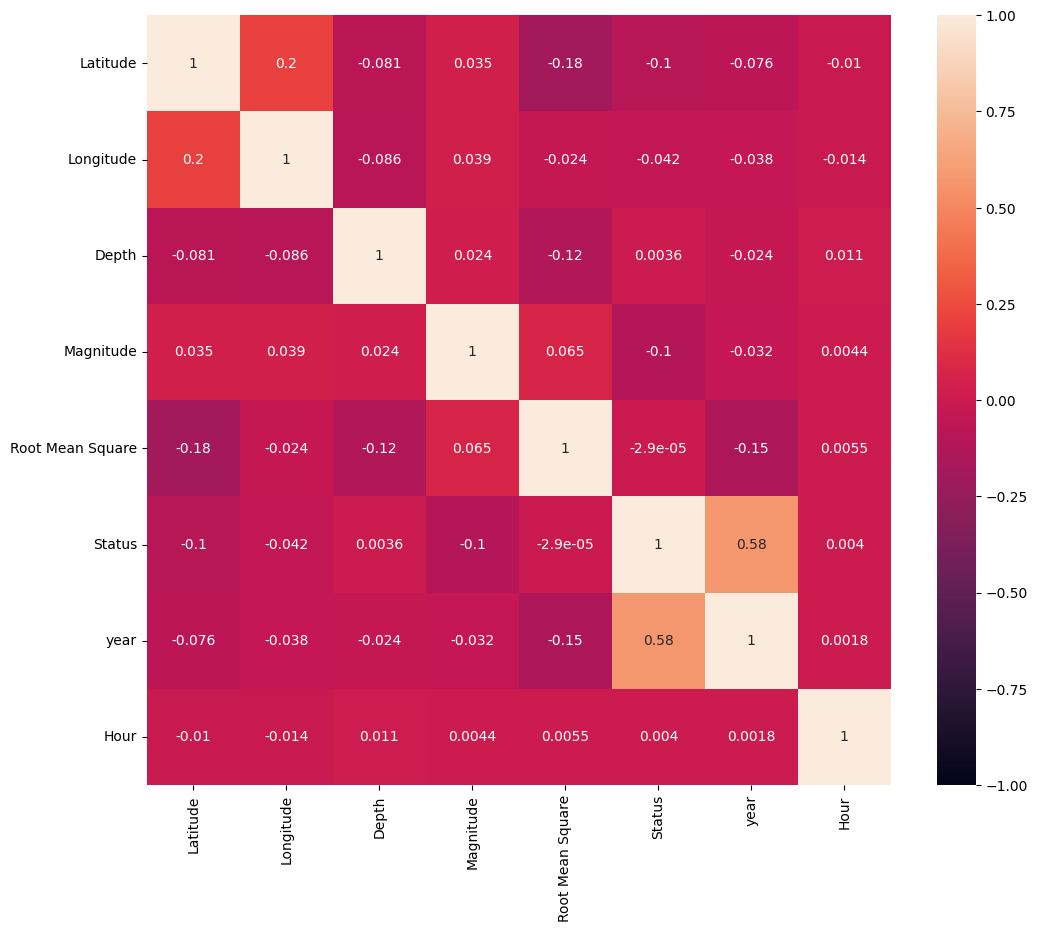

In [148]:
plt.figure(figsize=(12,10))
sns.heatmap(corr, annot = True, vmin=-1.0, vmax=1.0)
plt.show()

C:\Users\subit\AppData\Local\Temp\ipykernel_16172\2990136411.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[columns], shade = True)
C:\Users\subit\AppData\Local\Temp\ipykernel_16172\2990136411.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[columns], shade = True)
C:\Users\subit\AppData\Local\Temp\ipykernel_16172\2990136411.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[columns], shade = True)
C:\Users\subit\AppData\Local\Temp\ipykernel_16172\2990136411.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please upda

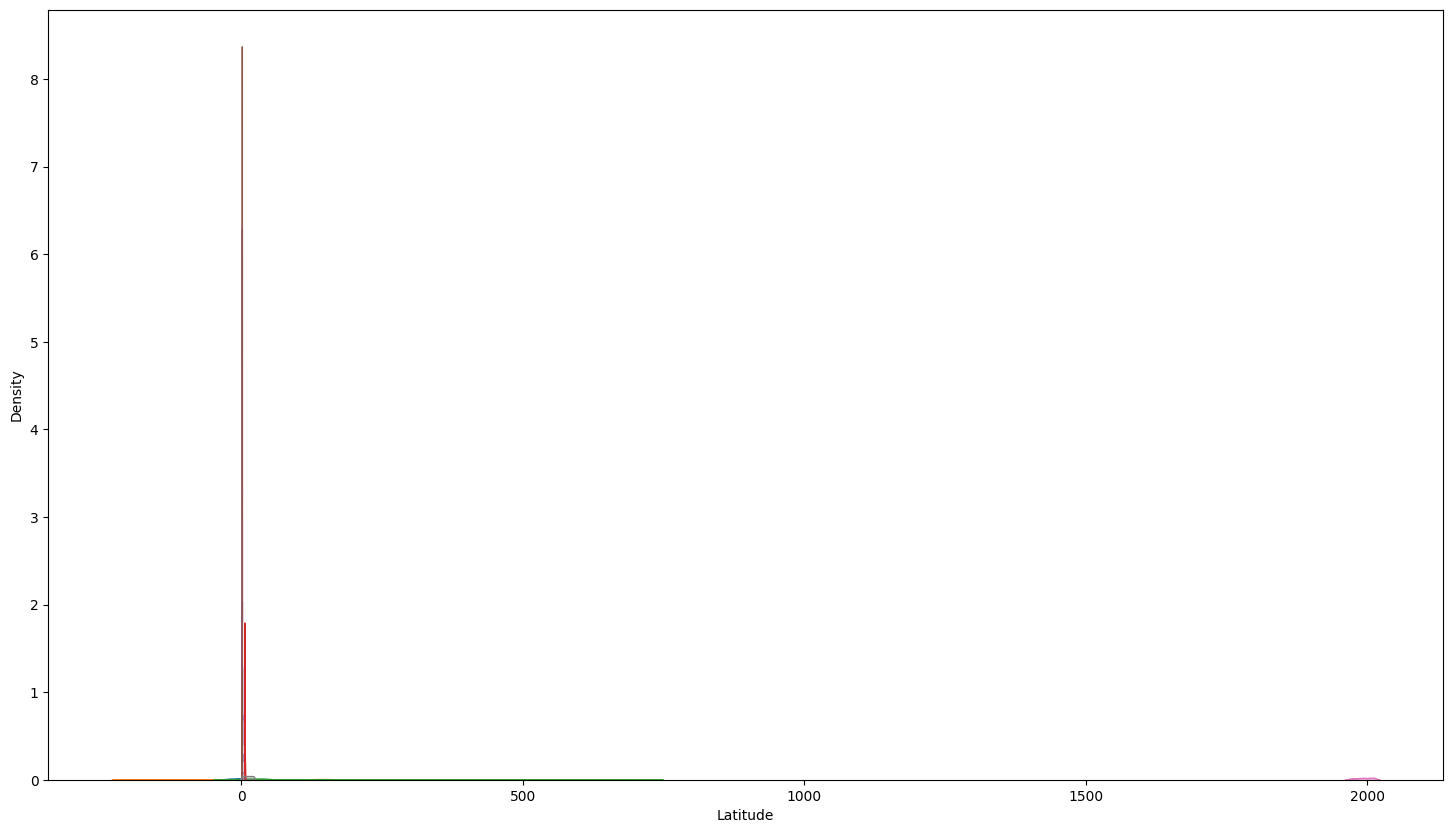

In [149]:
plt.figure(figsize=(18,10))
for columns in numeric_col:
    sns.kdeplot(df[columns], shade = True)
plt.show()

In [150]:
scaler = StandardScaler()
std_df = pd.DataFrame(scaler.fit_transform(df[numeric_col].copy()),columns=numeric_col )

C:\Users\subit\AppData\Local\Temp\ipykernel_16172\3170088970.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(std_df[columns], shade = True)
C:\Users\subit\AppData\Local\Temp\ipykernel_16172\3170088970.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(std_df[columns], shade = True)
C:\Users\subit\AppData\Local\Temp\ipykernel_16172\3170088970.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(std_df[columns], shade = True)
C:\Users\subit\AppData\Local\Temp\ipykernel_16172\3170088970.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0;

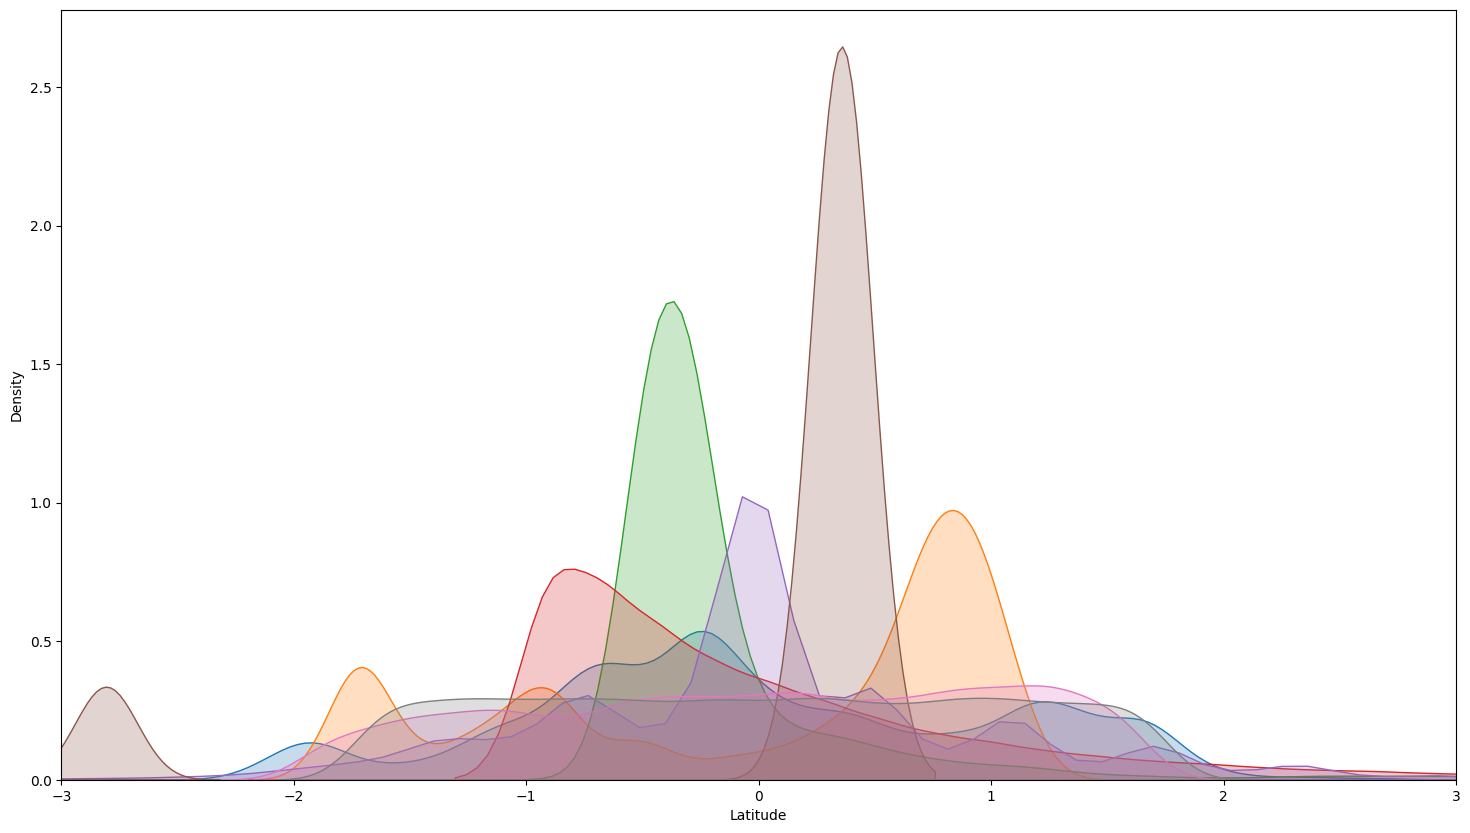

In [151]:
plt.figure(figsize=(18,10))
for columns in numeric_col:
    sns.kdeplot(std_df[columns], shade = True)
plt .xlim(-3,3)
plt.show()

# Encodeing

In [152]:
df.head()

,Latitude,Longitude,Type,Depth,Magnitude,Magnitude Type,Root Mean Square,Source,Location Source,Magnitude Source,Status,month,year,Hour
0,19.246,145.616,Earthquake,131.6,6.0,MW,1.022784,ISCGEM,ISCGEM,ISCGEM,0,01,1965,13
1,1.863,127.352,Earthquake,80.0,5.8,MW,1.022784,ISCGEM,ISCGEM,ISCGEM,0,01,1965,11
2,-20.579,-173.972,Earthquake,20.0,6.2,MW,1.022784,ISCGEM,ISCGEM,ISCGEM,0,01,1965,18
3,-59.076,-23.557,Earthquake,15.0,5.8,MW,1.022784,ISCGEM,ISCGEM,ISCGEM,0,01,1965,18
4,11.938,126.427,Earthquake,15.0,5.8,MW,1.022784,ISCGEM,ISCGEM,ISCGEM,0,01,1965,13


In [153]:
df["Type"].unique()

array(['Earthquake', 'Nuclear Explosion', 'Explosion', 'Rock Burst'],
      dtype=object)

In [154]:
pd.get_dummies(df["Type"], prefix = 'TYPE').astype(int).head()

,TYPE_Earthquake,TYPE_Explosion,TYPE_Nuclear Explosion,TYPE_Rock Burst
0,1,0,0,0
1,1,0,0,0
2,1,0,0,0
3,1,0,0,0
4,1,0,0,0


In [155]:
def onehot_encoding(df_1, columns, prefixes):
    df_1 = df_1.copy()
    for column,prefix in zip(columns,prefixes):
        dummies = pd.get_dummies(df_1[column],prefix = prefix).astype(int)
        df_1= pd.concat([df_1,dummies], axis =1)
        df_1 = df_1.drop(column, axis =1)
    return df_1
        

In [156]:
df = onehot_encoding(df,
                       ['Type','Magnitude Type','Source','Location Source','Magnitude Source'],
                       ['T','MT','S','LS','MS']
                      )

In [158]:
df.head()

,Latitude,Longitude,Depth,Magnitude,Root Mean Square,Status,month,year,Hour,T_Earthquake,...,MS_NN,MS_OFFICIAL,MS_PAR,MS_PGC,MS_PR,MS_SE,MS_US,MS_US_GCMT,MS_US_PGC,MS_UW
0,19.246,145.616,131.6,6.0,1.022784,0,01,1965,13,1,...,0,0,0,0,0,0,0,0,0,0
1,1.863,127.352,80.0,5.8,1.022784,0,01,1965,11,1,...,0,0,0,0,0,0,0,0,0,0
2,-20.579,-173.972,20.0,6.2,1.022784,0,01,1965,18,1,...,0,0,0,0,0,0,0,0,0,0
3,-59.076,-23.557,15.0,5.8,1.022784,0,01,1965,18,1,...,0,0,0,0,0,0,0,0,0,0
4,11.938,126.427,15.0,5.8,1.022784,0,01,1965,13,1,...,0,0,0,0,0,0,0,0,0,0


# Split and scale the data

In [159]:
Y = df['Status']
X = df.drop("Status",axis = 1)

In [162]:
Y.shape

(23406,)

In [164]:
X.shape

(23406, 104)

In [165]:
X = scaler.fit_transform(X)

In [166]:
X_train, X_test, Y_train,Y_test = train_test_split(X, Y, train_size = 0.7, random_state= 56)


# Model 

In [178]:
inputs = tf.keras.Input(shape = 104,)
x = tf.keras.layers.Dense(64, activation ='relu')(inputs)
x = tf.keras.layers.Dense(64, activation ='relu')(x)
outputs = tf.keras.layers.Dense(1, activation ='sigmoid')(x)

model = tf.keras.Model(inputs, outputs)

model.compile(
    optimizer = 'adam',
    loss = 'binary_crossentropy',
    metrics = [tf.keras.metrics.AUC(name ="auc")]
)

batch_size = 32
epochs = 30

history = model.fit(X_train, Y_train,
                   validation_split = 0.1,
                   batch_size = batch_size,
                   epochs = epochs,
                   callbacks = [tf.keras.callbacks.ReduceLROnPlateau()],
                   verbose = 0)

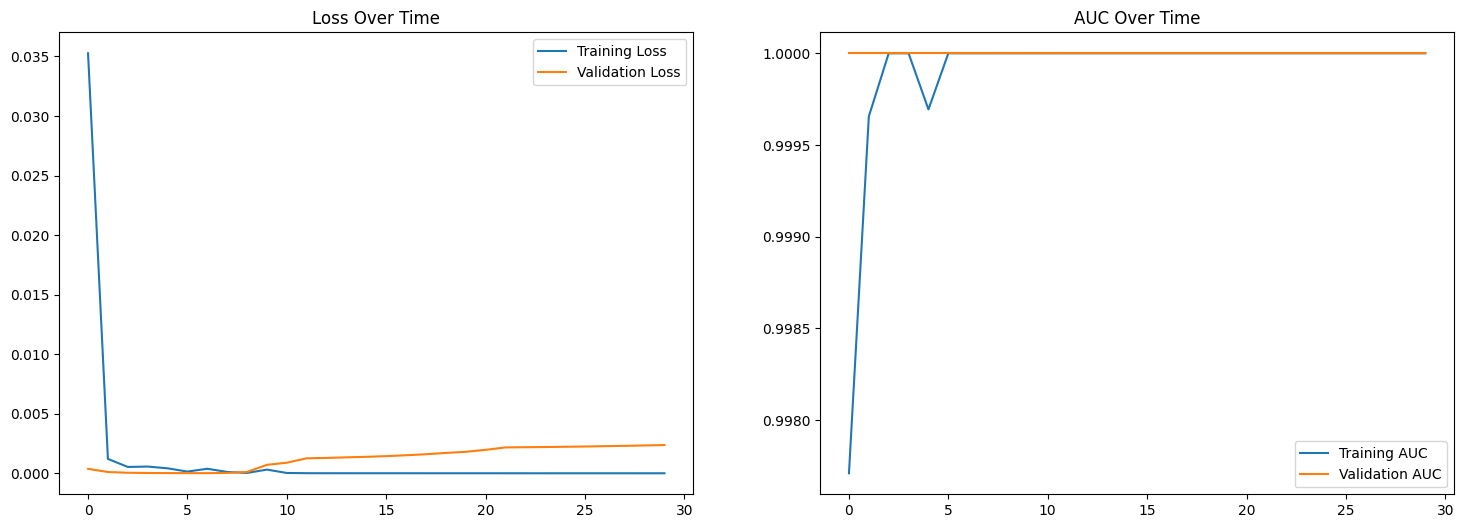

In [179]:
plt.figure(figsize=(18, 6))

epochs_range = range(epochs)
train_loss, val_loss = history.history['loss'], history.history['val_loss']
train_auc, val_auc = history.history['auc'], history.history['val_auc']

plt.subplot(1, 2, 1)
plt.plot(epochs_range, train_loss, label="Training Loss")
plt.plot(epochs_range, val_loss, label="Validation Loss")
plt.legend()
plt.title("Loss Over Time")

plt.subplot(1, 2, 2)
plt.plot(epochs_range, train_auc, label="Training AUC")
plt.plot(epochs_range, val_auc, label="Validation AUC")
plt.legend()
plt.title("AUC Over Time")

plt.show()

In [181]:
model.evaluate(X_test, Y_test)

220/220 [==============================] - 1s 4ms/step - loss: 5.5018e-05 - auc: 1.0000


[5.50180884602014e-05, 1.0]

In [183]:
# Save the model to a pickle file
with open('model.pkl', 'wb') as f:
    pickle.dump(model, f)

INFO:tensorflow:Assets written to: ram://f0fa4698-12b9-4b4f-810e-212897526aa6/assets
